# Bellcore data transference analisys

* Caio Everest - caioeverest@edu.unirio.br
* Cesar Silva - cesar.silva@edu.unirio.br

## imports

In [91]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import pareto, mielke, nakagami, pearson3
from scipy.stats import skew, kurtosis
from scipy import signal
from statsmodels.tsa.stattools import acf, pacf

## read file and set columns identifiers

In [2]:
path_file = 'bellcore_data.csv'
df = pd.read_csv(path_file,header=None)
df.columns = ['time', 'package_size']
df.describe()

,time,package_size
count,1000000.000000,1000000.000000
mean,452.770252,638.289839
std,251.903286,519.180878
min,0.000000,64.000000
25%,254.879005,130.000000
50%,444.953128,1082.000000
75%,641.193766,1082.000000
max,999.996808,1518.000000


In [3]:
df.time = pd.to_timedelta(df.time, unit="s")
df.set_index("time",inplace=True)

## Package size

In [4]:
ps_array = np.array(df.package_size)

### Plot histogram of PackageSize

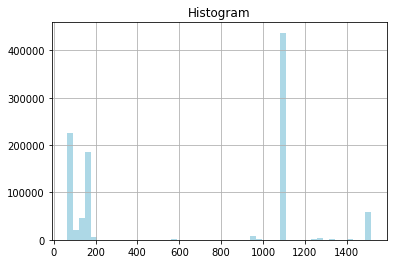

In [5]:
ps_hx, ps_hy, _ = plt.hist(ps_array, bins=50, color="lightblue")

plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Apply cumulative sum function 

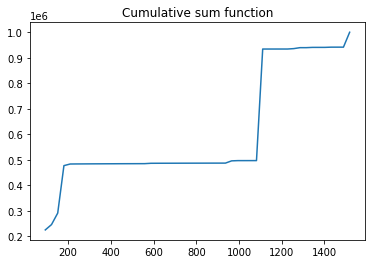

In [6]:
ps_cumsum = np.cumsum(ps_hx)
ps_ccdf = 1 - np.cumsum(ps_hx)
ps_acf = acf(ps_hx, nlags=20, fft=False)

plt.plot(ps_hy[1:], ps_cumsum)

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Kurtosis and Skewness

In [8]:
ps_skewness = df.package_size.skew()
ps_kurtosis = df.package_size.kurtosis()
print(f"Skewness: {ps_skewness}\nKurtosis: {ps_kurtosis}")

Skewness: 0.06706748541553284
Kurtosis: -1.7370258256563889


## Analisys

In [9]:
df_100ms = df.package_size.resample('100ms').mean()
df_1s = df.package_size.resample('1s').mean()
df_10s = df.package_size.resample('10s').mean()

In [10]:
df_100ms.describe()

count    9998.000000
mean      629.974211
std       159.518004
min        64.000000
25%       552.377404
50%       647.821287
75%       732.790184
max      1241.428571
Name: package_size, dtype: float64

In [11]:
df_1s.describe()

count    1000.000000
mean      634.518763
std        98.104762
min       144.520161
25%       588.484790
50%       644.569058
75%       695.482995
max       898.108696
Name: package_size, dtype: float64

In [12]:
df_10s.describe()

count    100.000000
mean     636.003110
std       73.424498
min      336.908525
25%      604.706612
50%      651.287002
75%      682.536044
max      794.329938
Name: package_size, dtype: float64

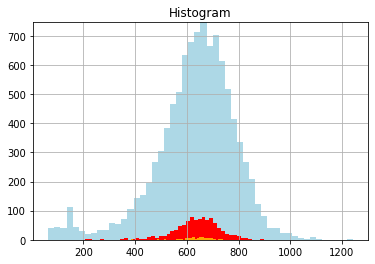

In [13]:
d100ms_hx, d100ms_hy, _ = plt.hist(df_100ms, bins=50, color="lightblue")
d1s_hx, d1s_hy, _ = plt.hist(df_1s, bins=50, color="red")
d1s_hx, d1s_hy, _ = plt.hist(df_10s, bins=50, color="orange")

plt.ylim(0.0,max(d100ms_hx)+0.05)
plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

## 100ms

### Histogram

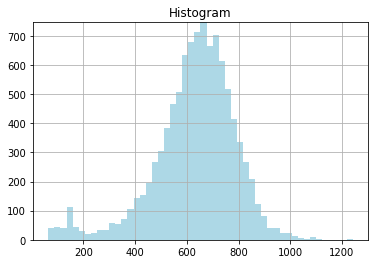

In [14]:
d100ms_hx, d100ms_hy, _ = plt.hist(df_100ms, bins=50, color="lightblue")

plt.ylim(0.0,max(d100ms_hx)+0.05)
plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Cumulative sum function

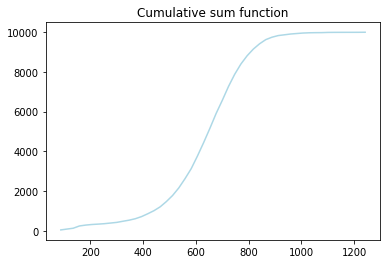

In [15]:
dx = d100ms_hx[1] - d100ms_hy[0]
ps_100ms_cumsum = np.cumsum(d100ms_hx)

plt.plot(d100ms_hy[1:], ps_100ms_cumsum, color="lightblue")

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Poisson

Text(0, 0.5, 'P(X=k)')

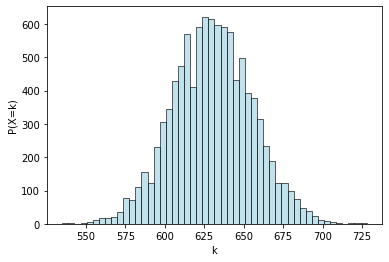

In [16]:
poisson_100ms = poisson.rvs(mu=df_100ms.mean(), size=df_100ms.size)
sns.histplot(poisson_100ms, color="lightblue", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

Text(0, 0.5, 'P(X=k)')

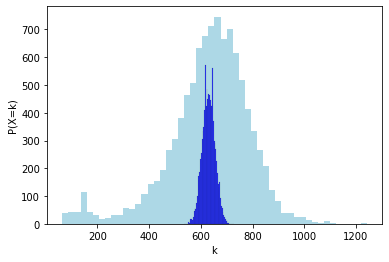

In [17]:
d100ms_hx, d100ms_hy, _ = plt.hist(df_100ms, bins=50, color="lightblue")
sns.histplot(poisson_100ms, color="blue")
plt.xlabel('k')
plt.ylabel('P(X=k)')

### Kurtosis and skewness

In [18]:
skewness_100ms = df_100ms.skew()
kurtosis_100ms = df_100ms.kurtosis()
print(f"Skewness: {skewness_100ms}\nKurtosis: {kurtosis_100ms}")

Skewness: -0.8639582972718376
Kurtosis: 1.6652734682835595


### CCDF On log

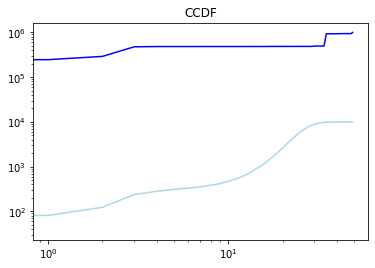

In [35]:
ps_100ms_ccdf = 1 - ps_100ms_cumsum

plt.plot(ps_100ms_ccdf * -1, color="lightblue")
plt.plot(ps_ccdf * -1, color="blue")

plt.yscale("log")
plt.xscale("log")
plt.title('CCDF')

plt.show()
plt.close()

### ACF

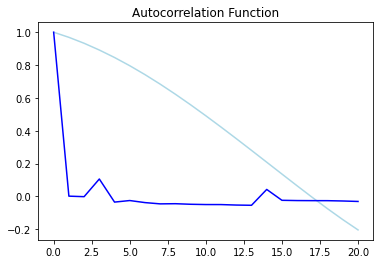

In [20]:
ps_100ms_acf = acf(ps_100ms_ccdf, nlags=20, fft=False)

plt.plot(ps_100ms_acf, color="lightblue")
plt.plot(ps_acf, color="blue")

# plt.yscale("log")
# plt.xscale("log")
plt.title('Autocorrelation Function')

plt.show()
plt.close()

### Attempts to find a maching distribution

#### Pareto

Text(0, 0.5, 'P(X=k)')

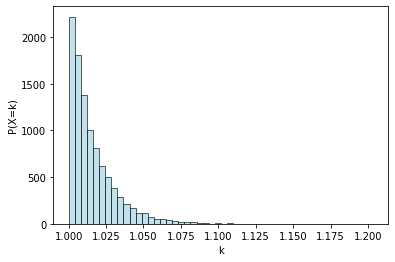

In [54]:
pareto_100ms = pareto.rvs(df_100ms.sort_values()[0], size=df_100ms.size)
sns.histplot(pareto_100ms, color="lightblue", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [55]:
pareto_skewness_100ms = skew(pareto_100ms)
pareto_kurtosis_100ms = kurtosis(pareto_100ms)
print(f"Skewness: original[{skewness_100ms}]\t| new[{pareto_skewness_100ms}]\nKurtosis: original[{kurtosis_100ms}]\t| new[{pareto_kurtosis_100ms}]")

Skewness: original[-0.8639582972718376]	| new[2.329608430046677]
Kurtosis: original[1.6652734682835595]	| new[9.782363346327033]


#### Mielke

Text(0, 0.5, 'P(X=k)')

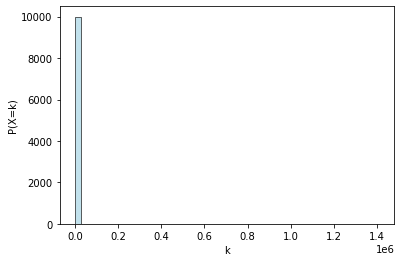

In [85]:
mielke_100ms = mielke.rvs(k=kurtosis_100ms, s=skewness_100ms*-1, size=df_100ms.size)
sns.histplot(mielke_100ms, color="lightblue", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [86]:
mielke_skewness_100ms = skew(mielke_100ms)
mielke_kurtosis_100ms = kurtosis(mielke_100ms)
print(f"Skewness: original[{skewness_100ms}]\t| new[{mielke_skewness_100ms}]\nKurtosis: original[{kurtosis_100ms}]\t| new[{mielke_kurtosis_100ms}]")

Skewness: original[-0.8639582972718376]	| new[84.18730639738189]
Kurtosis: original[1.6652734682835595]	| new[7461.086463242929]


#### Nakagami

Text(0, 0.5, 'P(X=k)')

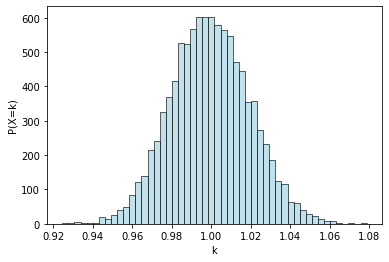

In [89]:
nakagami_100ms = nakagami.rvs(df_100ms.mean(), size=df_100ms.size)
sns.histplot(nakagami_100ms, color="lightblue", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [90]:
nakagami_skewness_100ms = skew(nakagami_100ms)
nakagami_kurtosis_100ms = kurtosis(nakagami_100ms)
print(f"Skewness: original[{skewness_100ms}]\t| new[{nakagami_skewness_100ms}]\nKurtosis: original[{kurtosis_100ms}]\t| new[{nakagami_kurtosis_100ms}]")

Skewness: original[-0.8639582972718376]	| new[0.06915239879857302]
Kurtosis: original[1.6652734682835595]	| new[-0.04291017784287554]


#### pearson3

Text(0, 0.5, 'P(X=k)')

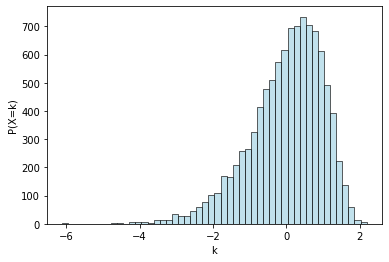

In [95]:
pearson3_100ms = pearson3.rvs(skewness_100ms, size=df_100ms.size)
sns.histplot(pearson3_100ms, color="lightblue", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [96]:
pearson3_skewness_100ms = skew(pearson3_100ms)
pearson3_kurtosis_100ms = kurtosis(pearson3_100ms)
print(f"Skewness: original[{skewness_100ms}]\t| new[{pearson3_skewness_100ms}]\nKurtosis: original[{kurtosis_100ms}]\t| new[{pearson3_kurtosis_100ms}]")

Skewness: original[-0.8639582972718376]	| new[-0.9208928156165083]
Kurtosis: original[1.6652734682835595]	| new[1.3075299099572142]


## 1 Sec

### Histogram

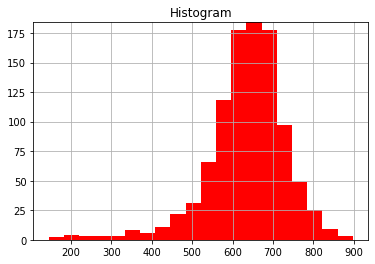

In [21]:
d1s_hx, d1s_hy, _ = plt.hist(df_1s, bins=20, color="red")

plt.ylim(0.0,max(d1s_hx)+0.05)
plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Cumulative sum function

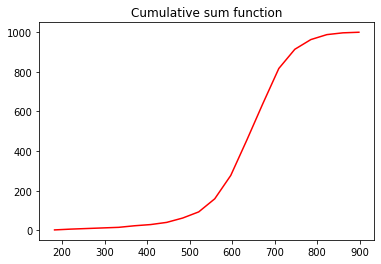

In [22]:
ps_1s_cumsum = np.cumsum(d1s_hx)

plt.plot(d1s_hy[1:], ps_1s_cumsum, color="red")

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Poisson

Text(0, 0.5, 'P(X=k)')

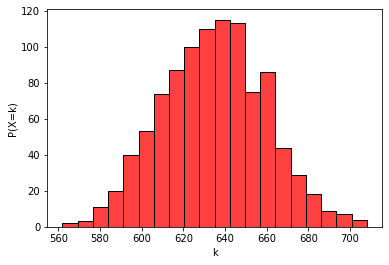

In [23]:
poisson_1s = poisson.rvs(mu=df_1s.mean(), size=df_1s.size)
sns.histplot(poisson_1s, color="red", bins=20)
plt.xlabel('k')
plt.ylabel('P(X=k)')

Text(0, 0.5, 'P(X=k)')

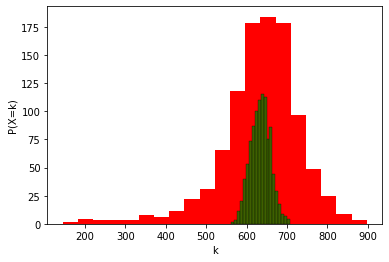

In [24]:
_, _, _ = plt.hist(df_1s, bins=20, color="red")
sns.histplot(poisson_1s, color="green", bins=20)
plt.xlabel('k')
plt.ylabel('P(X=k)')

### Kurtosis and skewness

In [25]:
skewness_1s = df_1s.skew()
kurtosis_1s = df_1s.kurtosis()
print(f"Skewness: {skewness_1s}\nKurtosis: {kurtosis_1s}")

Skewness: -1.1721574747649857
Kurtosis: 3.3777700549876033


### CCDF On log

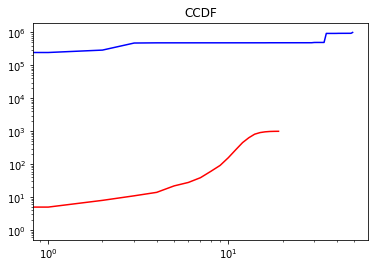

In [26]:
ps_1s_ccdf = 1 - ps_1s_cumsum

plt.plot(ps_1s_ccdf * -1, color="red")
plt.plot(ps_ccdf * -1, color="blue")

plt.yscale("log")
plt.xscale("log")
plt.title('CCDF')

plt.show()
plt.close()

### ACF

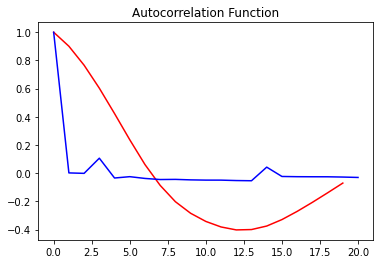

In [27]:
ps_1s_acf = acf(ps_1s_ccdf, nlags=20, fft=False)

plt.plot(ps_1s_acf, color="red")
plt.plot(ps_acf, color="blue")

# plt.yscale("log")
# plt.xscale("log")
plt.title('Autocorrelation Function')

plt.show()
plt.close()

### Attempts to find a maching distribution

#### Pareto

Text(0, 0.5, 'P(X=k)')

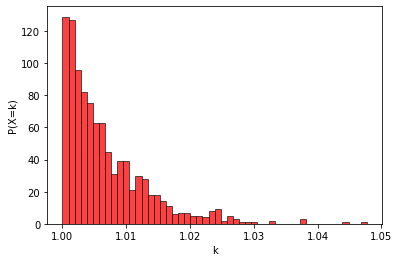

In [97]:
pareto_1s = pareto.rvs(df_1s.sort_values()[0], size=df_1s.size)
sns.histplot(pareto_1s, color="red", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [98]:
pareto_skewness_1s = skew(pareto_1s)
pareto_kurtosis_1s = kurtosis(pareto_1s)
print(f"Skewness: original[{skewness_1s}]\t| new[{pareto_skewness_1s}]\nKurtosis: original[{kurtosis_1s}]\t| new[{pareto_kurtosis_1s}]")

Skewness: original[-1.1721574747649857]	| new[1.8313867830340682]
Kurtosis: original[3.3777700549876033]	| new[4.675734479653491]


#### Mielke

Text(0, 0.5, 'P(X=k)')

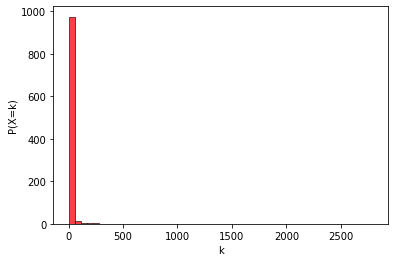

In [99]:
mielke_1s = mielke.rvs(k=kurtosis_1s, s=skewness_1s*-1, size=df_1s.size)
sns.histplot(mielke_1s, color="red", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [100]:
mielke_skewness_1s = skew(mielke_1s)
mielke_kurtosis_1s = kurtosis(mielke_1s)
print(f"Skewness: original[{skewness_1s}]\t| new[{mielke_skewness_1s}]\nKurtosis: original[{kurtosis_1s}]\t| new[{mielke_kurtosis_1s}]")

Skewness: original[-1.1721574747649857]	| new[24.722257081096437]
Kurtosis: original[3.3777700549876033]	| new[693.1362524929767]


#### Nakagami

Text(0, 0.5, 'P(X=k)')

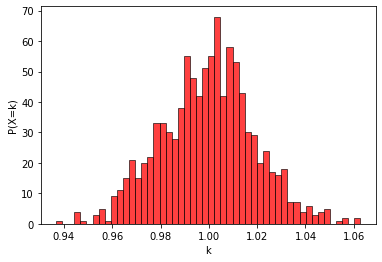

In [101]:
nakagami_1s = nakagami.rvs(df_1s.mean(), size=df_1s.size)
sns.histplot(nakagami_1s, color="red", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [102]:
nakagami_skewness_1s = skew(nakagami_1s)
nakagami_kurtosis_1s = kurtosis(nakagami_1s)
print(f"Skewness: original[{skewness_1s}]\t| new[{nakagami_skewness_1s}]\nKurtosis: original[{kurtosis_1s}]\t| new[{nakagami_kurtosis_1s}]")

Skewness: original[-1.1721574747649857]	| new[0.014678081913136899]
Kurtosis: original[3.3777700549876033]	| new[0.09911541344387409]


#### pearson3

Text(0, 0.5, 'P(X=k)')

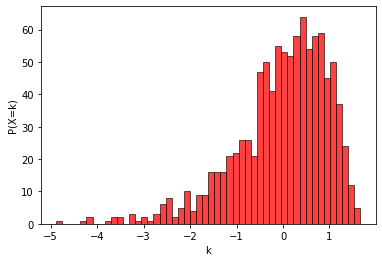

In [103]:
pearson3_1s = pearson3.rvs(skewness_1s, size=df_1s.size)
sns.histplot(pearson3_1s, color="red", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [104]:
pearson3_skewness_1s = skew(pearson3_1s)
pearson3_kurtosis_1s = kurtosis(pearson3_1s)
print(f"Skewness: original[{skewness_1s}]\t| new[{pearson3_skewness_1s}]\nKurtosis: original[{kurtosis_1s}]\t| new[{pearson3_kurtosis_1s}]")

Skewness: original[-1.1721574747649857]	| new[-1.1313447586705119]
Kurtosis: original[3.3777700549876033]	| new[1.7434667639465236]


## 10 Sec

### Histogram

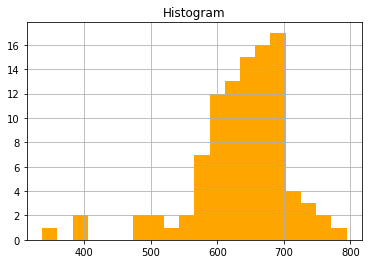

In [28]:
d10s_hx, d10s_hy, _ = plt.hist(df_10s, color="orange", bins=20)

plt.title('Histogram')
plt.grid()

plt.show()
plt.close()

### Cumulative sum function

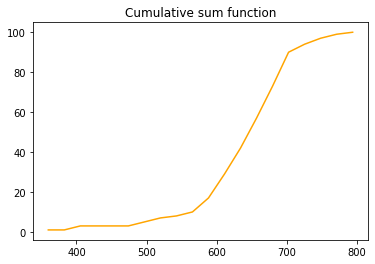

In [29]:
ps_10s_cumsum = np.cumsum(d10s_hx)

plt.plot(d10s_hy[1:], ps_10s_cumsum, color="orange")

plt.title('Cumulative sum function')

plt.show()
plt.close()

### Poisson

Text(0, 0.5, 'P(X=k)')

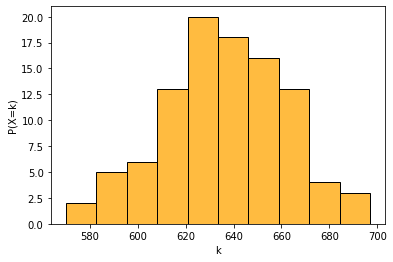

In [30]:
poisson_10s = poisson.rvs(mu=df_10s.mean(), size=df_10s.size)
sns.histplot(poisson_10s, color="orange", bins=10)
plt.xlabel('k')
plt.ylabel('P(X=k)')

Text(0, 0.5, 'P(X=k)')

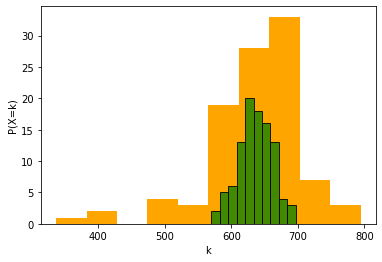

In [31]:
_, _, _ = plt.hist(df_10s, bins=10, color="orange")
sns.histplot(poisson_10s, color="green", bins=10)
plt.xlabel('k')
plt.ylabel('P(X=k)')

### Kurtosis and skewness

In [32]:
skewness_10s = df_10s.skew()
kurtosis_10s = df_10s.kurtosis()
print(f"Skewness: {skewness_10s}\nKurtosis: {kurtosis_10s}")

Skewness: -1.4350187428921977
Kurtosis: 3.929462753771926


### CCDF On log

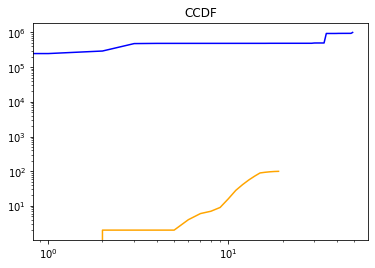

In [33]:
ps_10s_ccdf = 1 - ps_10s_cumsum

plt.plot(ps_10s_ccdf * -1, color="orange")
plt.plot(ps_ccdf * -1, color="blue")

plt.yscale("log")
plt.xscale("log")
plt.title('CCDF')

plt.show()
plt.close()

### ACF

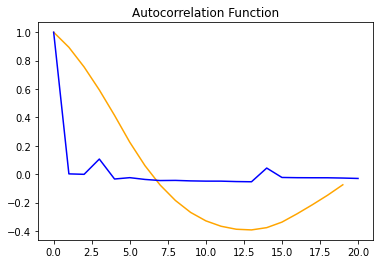

In [34]:
ps_10s_acf = acf(ps_10s_ccdf, nlags=20, fft=False)

plt.plot(ps_10s_acf, color="orange")
plt.plot(ps_acf, color="blue")

# plt.yscale("log")
# plt.xscale("log")
plt.title('Autocorrelation Function')

plt.show()
plt.close()

### Attempts to find a maching distribution

#### Pareto

Text(0, 0.5, 'P(X=k)')

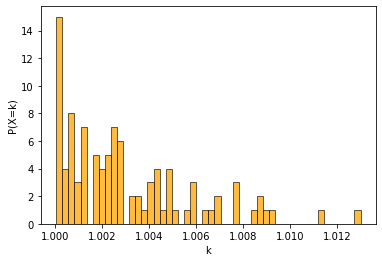

In [105]:
pareto_10s = pareto.rvs(df_10s.sort_values()[0], size=df_10s.size)
sns.histplot(pareto_10s, color="orange", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [106]:
pareto_skewness_10s = skew(pareto_10s)
pareto_kurtosis_10s = kurtosis(pareto_10s)
print(f"Skewness: original[{skewness_10s}]\t| new[{pareto_skewness_10s}]\nKurtosis: original[{kurtosis_10s}]\t| new[{pareto_kurtosis_10s}]")

Skewness: original[-1.4350187428921977]	| new[1.2357352424168522]
Kurtosis: original[3.929462753771926]	| new[1.1899261986378162]


#### Mielke

Text(0, 0.5, 'P(X=k)')

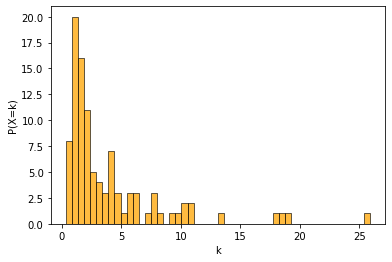

In [107]:
mielke_10s = mielke.rvs(k=kurtosis_10s, s=skewness_10s*-1, size=df_10s.size)
sns.histplot(mielke_10s, color="orange", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [108]:
mielke_skewness_10s = skew(mielke_10s)
mielke_kurtosis_10s = kurtosis(mielke_10s)
print(f"Skewness: original[{skewness_10s}\t| new[{mielke_skewness_10s}]\nKurtosis: original[{kurtosis_10s}]\t| new[{mielke_kurtosis_10s}]")

Skewness: original[-1.4350187428921977	| new[2.565863441246292]
Kurtosis: original[3.929462753771926]	| new[7.583801889053962]


#### Nakagami

Text(0, 0.5, 'P(X=k)')

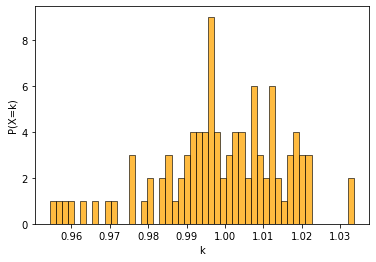

In [109]:
nakagami_10s = nakagami.rvs(df_10s.mean(), size=df_10s.size)
sns.histplot(nakagami_10s, color="orange", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [110]:
nakagami_skewness_10s = skew(nakagami_10s)
nakagami_kurtosis_10s = kurtosis(nakagami_10s)
print(f"Skewness: original[{skewness_10s}]\t| new[{nakagami_skewness_10s}]\nKurtosis: original[{kurtosis_10s}]\t| new[{nakagami_kurtosis_10s}]")

Skewness: original[-1.4350187428921977]	| new[-0.5698485322689265]
Kurtosis: original[3.929462753771926]	| new[0.24233170809834403]


#### pearson3

Text(0, 0.5, 'P(X=k)')

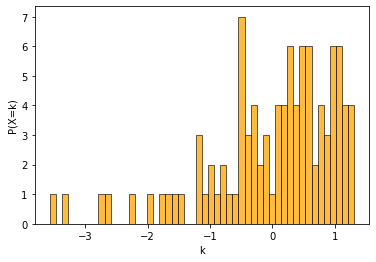

In [111]:
pearson3_10s = pearson3.rvs(skewness_10s, size=df_10s.size)
sns.histplot(pearson3_10s, color="orange", bins=50)
plt.xlabel('k')
plt.ylabel('P(X=k)')

In [96]:
pearson3_skewness_10s = skew(pearson3_10s)
pearson3_kurtosis_10s = kurtosis(pearson3_10s)
print(f"Skewness: original[{skewness_10s}]\t| new[{pearson3_skewness_10s}]\nKurtosis: original[{kurtosis_10s}]\t| new[{pearson3_kurtosis_10s}]")

Skewness: original[-0.8639582972718376]	| new[-0.9208928156165083]
Kurtosis: original[1.6652734682835595]	| new[1.3075299099572142]
